<a href="https://colab.research.google.com/github/seungyihong/AI_ml/blob/master/titanic_survival2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 확인


> Import

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 데이터 로드 및 확인

> 데이터 확인
*   survived : 0 = No, 1 = YES
*   Pclass : 1 = 1st,  2 = 2nd,  3 = 3rd
*   Sex : 성별
*   Age : 나이
*   Sibsp : 형재, 아내나 남편
*   Parch : 부모, 자식
*   Ticket : 티켓 number
*   Fare : 요금
*   Cabin : Cabin number
*   Embarked : 
C = Cherbourg, 
Q = Queenstown, 
S= Southampton









In [0]:
df_train = pd.read_csv('/content/drive/My Drive/타이타닉/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/타이타닉/test.csv')

In [172]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [173]:
df_train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df_train.drop(['Ticket','Fare','Cabin'],axis=1,inplace=True)
df_test.drop(['Ticket','Fare','Cabin'],axis=1,inplace=True)

In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       889 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [177]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 26.2+ KB


# 함수 정의

In [0]:
def title_mapping(x):
 map_title = {'Mr' : 0 , 'Miss': 1, 'Mrs' :2, 'Master' : 3, 'Other' : 4 }
 return map_title[x]

def bar_chart(feature):
  survived = df_train[df_train['Survived']==1][feature].value_counts()
  dead = df_train[df_train['Survived']== 0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar', stacked=True, figsize=(10,5))

# 데이터 전처리



In [0]:
mydata_train_test = [df_train,df_test]



# 'Name'  



In [0]:
for dataset in mydata_train_test:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [181]:
df_train['Title'].value_counts()
# Mr : 남자, Miss : 미혼, Mrs : 기혼, master :남자(?),주인? 

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Ms            1
Don           1
Capt          1
Mme           1
Countess      1
Sir           1
Lady          1
Name: Title, dtype: int64

In [182]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [183]:
pd.crosstab(df_train['Title'],df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [184]:
pd.crosstab(df_test['Title'],df_test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [185]:
for dataset in mydata_train_test:
  dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Jonkheer', 'Sir'], 'Other')
  dataset['Title'] = dataset['Title'].replace('Dr', 'Mr')
  dataset['Title'] = dataset['Title'].replace('Rev', 'Mr')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Lady', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Major', 'Mr')
df_train[['Title','Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.704301
Mr,0.159774
Mrs,0.793651
Other,0.428571


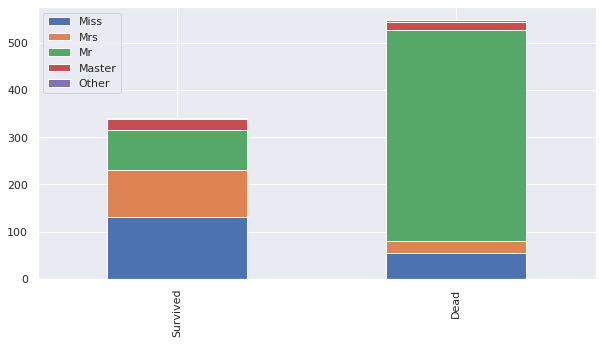

In [186]:
bar_chart('Title')

In [0]:
for dataset in mydata_train_test:
  dataset['Title'] = dataset['Title'].map(title_mapping)

# map_title = {'Mr' : 0 , 'Miss': 1, 'Mrs' :2, 'Master' : 3, 'Other' : 4 }

In [0]:
df_train.drop(['Name'],axis=1, inplace=True)
df_test.drop(['Name'],axis=1,inplace=True )

In [189]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,male,34.5,0,0,Q,0
1,893,3,female,47.0,1,0,S,2
2,894,2,male,62.0,0,0,Q,0
3,895,3,male,27.0,0,0,S,0
4,896,3,female,22.0,1,1,S,2
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,S,0
414,1306,1,female,39.0,0,0,C,4
415,1307,3,male,38.5,0,0,S,0
416,1308,3,male,NaN,0,0,S,0


# Sex 
male - 0 , female - 1

In [0]:
sex_mapping = {'male': 0, 'female': 1}

for dataset in mydata_train_test:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [191]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22.0,1,0,S,0
1,2,1,1,1,38.0,1,0,C,2
2,3,1,3,1,26.0,0,0,S,1
3,4,1,1,1,35.0,1,0,S,2
4,5,0,3,0,35.0,0,0,S,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,S,0
887,888,1,1,1,19.0,0,0,S,1
888,889,0,3,1,NaN,1,2,S,1
889,890,1,1,0,26.0,0,0,C,0


# Age

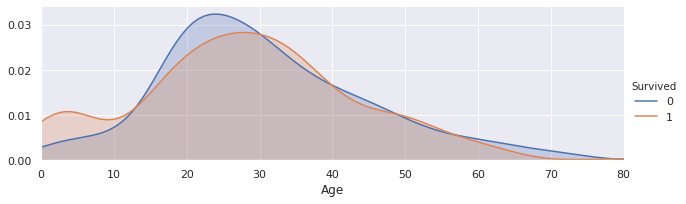

In [192]:
age_death = sns.FacetGrid(df_train, hue='Survived', aspect=3)
age_death.map(sns.kdeplot, 'Age', shade=True)
age_death.set(xlim=(0,df_train['Age'].max()))
age_death.add_legend()

In [0]:
fill = df_train.groupby('Title')['Age'].transform('median')
fill2 = df_test.groupby('Title')['Age'].transform('median')

In [0]:
df_train['Age'] = df_train['Age'].fillna(fill)
df_test['Age'] = df_test['Age'].fillna(fill2)

In [195]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
Title          0
dtype: int64

In [0]:
for dataset in mydata_train_test:
  dataset.loc[dataset['Age']<= 13, 'Age'] = 0,
  dataset.loc[(dataset['Age'] > 13) & (dataset['Age'] <= 31) , 'Age'] = 1,
  dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 39) , 'Age'] = 2,
  dataset.loc[(dataset['Age'] > 39) & (dataset['Age'] <= 48) , 'Age'] = 3,
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 58) , 'Age'] = 4,
  dataset.loc[(dataset['Age'] > 58) , 'Age'] = 5

In [197]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,1.0,1,0,S,0
1,2,1,1,1,2.0,1,0,C,2
2,3,1,3,1,1.0,0,0,S,1
3,4,1,1,1,2.0,1,0,S,2
4,5,0,3,0,2.0,0,0,S,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1.0,0,0,S,0
887,888,1,1,1,1.0,0,0,S,1
888,889,0,3,1,1.0,1,2,S,1
889,890,1,1,0,1.0,0,0,C,0


In [0]:
df_train['Age']=df_train['Age'].astype(int)
df_test['Age']=df_test['Age'].astype(int)

In [199]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,0,2,0,0,Q,0
1,893,3,1,3,1,0,S,2
2,894,2,0,5,0,0,Q,0
3,895,3,0,1,0,0,S,0
4,896,3,1,1,1,1,S,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,S,0
414,1306,1,1,2,0,0,C,4
415,1307,3,0,2,0,0,S,0
416,1308,3,0,1,0,0,S,0


# 'Family' = 'SibSp' + 'Parch'

In [0]:
for dataset in mydata_train_test:
  dataset['Family'] = dataset['SibSp'] + dataset['Parch']
  dataset['Family'] = dataset['Family'].astype(int)


In [0]:
df_train.drop(['SibSp','Parch'],axis=1,inplace=True)
df_test.drop(['SibSp','Parch'],axis=1,inplace=True)

# 'Embarked'

In [0]:
embarked_mapping = {"S":0, "C" :1, "Q":2}

In [0]:
for dataset in mydata_train_test:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [0]:
df_train['Embarked'].fillna(1, inplace=True)

In [205]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Title          0
Family         0
dtype: int64

In [206]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Embarked       0
Title          0
Family         0
dtype: int64

In [0]:
df_train['Embarked']=df_train['Embarked'].astype(int)
df_test['Embarked']=df_test['Embarked'].astype(int)

In [208]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,Family
0,1,0,3,0,1,0,0,1
1,2,1,1,1,2,1,2,1
2,3,1,3,1,1,0,1,0
3,4,1,1,1,2,0,2,1
4,5,0,3,0,2,0,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,0
887,888,1,1,1,1,0,1,0
888,889,0,3,1,1,0,1,3
889,890,1,1,0,1,1,0,0


In [209]:
df_test

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family
0,892,3,0,2,2,0,0
1,893,3,1,3,0,2,1
2,894,2,0,5,2,0,0
3,895,3,0,1,0,0,0
4,896,3,1,1,0,2,2
...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,0
414,1306,1,1,2,1,4,0
415,1307,3,0,2,0,0,0
416,1308,3,0,1,0,0,0


# 모델 설계


In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
if __name__ == '__main__':
  X= df_train.drop('Survived',axis=1).values
  y = df_train['Survived'].values

In [213]:
print(X.shape, X.dtype)
print(y.shape, y.dtype)

(891, 7) int64
(891,) int64


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [215]:
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_train.shape, y_train.dtype)
print(y_test.shape, y_test.dtype)

(623, 7) int64
(268, 7) int64
(623,) int64
(268,) int64


In [0]:
ml = RandomForestClassifier(n_estimators=100,max_features= 3, max_depth = 3,
                            min_samples_leaf= 30,
                            criterion='entropy',random_state=0, n_jobs=2)

In [221]:
ml.fit(X_train,y_train)
y_pred = ml.predict(df_test)
y_pred2 = ml.predict(X_test)
print('총 테스트 개수:%d 오류 개수 : %d' %(len(y_test), (y_test != y_pred2).sum()))
print('정확도 : %.2f' %accuracy_score(y_test, y_pred2))

총 테스트 개수:268 오류 개수 : 55
정확도 : 0.79


In [0]:
SAVE_FILE_NAME ='O'
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv(SAVE_FILE_NAME+'titanic_SUBMISSION.csv', index=False)